C:\Users\MAC\AppData\Local\Temp\ipykernel_1140\1597176085.py:80: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  newimage = filter.convolve(image,kernel_list[i],mode='constant', cval=0)


kernel
[[ 1.  0. -1.]
 [ 0.  0.  0.]
 [-1.  0.  1.]]

kernel
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

kernel
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]

kernel
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]

kernel
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]

kernel
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

flipped_kernel
[[ 1.  0. -1.]
 [ 0.  0.  0.]
 [-1.  0.  1.]]

flipped_kernel
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

flipped_kernel
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]

flipped_kernel
[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]

flipped_kernel
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]

flipped_kernel
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]



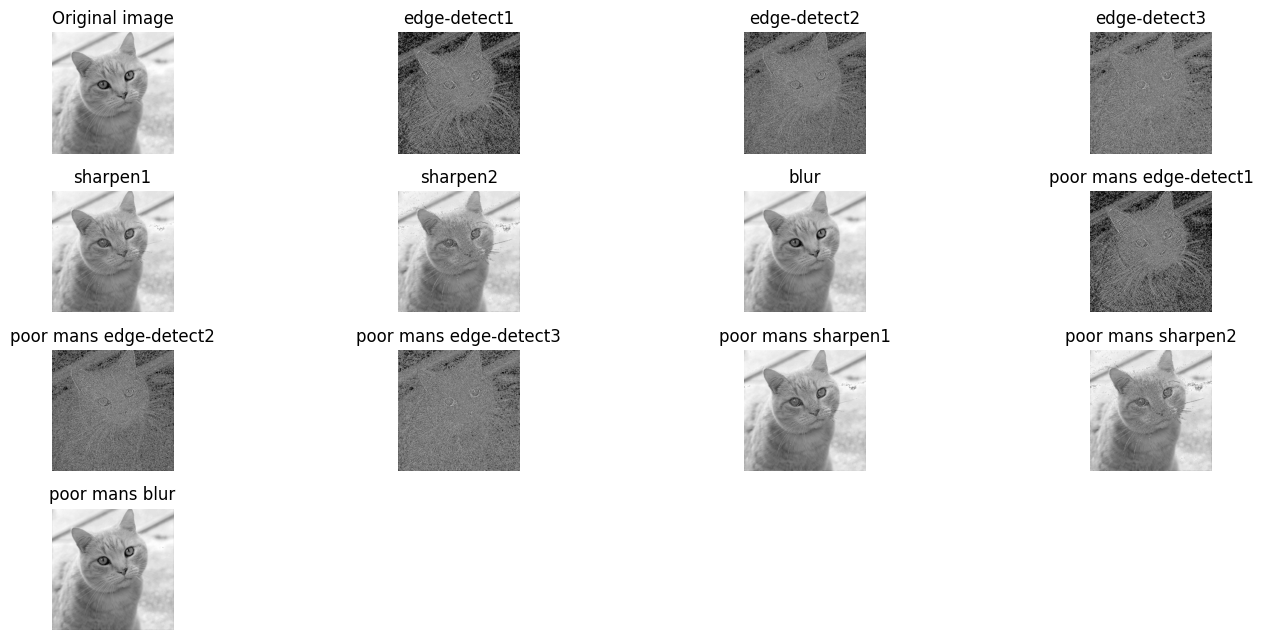

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import scipy.ndimage.filters as filter

def normalize(matrix):
    sum = np.sum(matrix)
    if sum > 0.:
        return matrix / sum
    else:
        return matrix

def neighbors(r,c,supermatrix): 
    m = supermatrix[r:r+3,c:c+3] 
    return m

def convolve(n,kernel):
    sum = 0
    for (rr,cc),value in np.ndenumerate(n):
        sum += n[rr,cc] * kernel[rr,cc]

    return sum % 255

def poor_mans_convolve(matrix,super,kernel,shape):
    result = np.ndarray(shape,dtype=float)

    for (r,c),value in np.ndenumerate(matrix):
        n = neighbors(r,c,super)
        result[r,c] = convolve(n,kernel)

    return result

fig = plt.figure(figsize=(14, 6.5), dpi=100)

kernel_edge_detect1 = np.array([[1.,0.,-1.],
                                [0.,0.,0.],
                                [-1.,0.,1.]])

kernel_edge_detect2 = np.array([[0.,1.,0.],
                                [1.,-4.,1.],
                                [0.,1.,0.]])

kernel_edge_detect3 = np.array([[-1.,-1.,-1.],
                                [-1.,8.,-1.],
                                [-1.,-1.,-1.]])

kernel_sharpen = np.array([[0.,-1.,0.],
                           [-1.,5.,-1.],
                           [0.,-1.,0.]])

kernel_sharpen2 = np.array([[-1.,-1.,-1.],
                           [-1.,9.,-1.],
                           [-1.,-1.,-1.]])

kernel_blur = np.array([[1.,1.,1.],
                        [1.,1.,1.],
                        [1.,1.,1.]])

kernel_list = [kernel_edge_detect1,kernel_edge_detect2,kernel_edge_detect3,kernel_sharpen,kernel_sharpen2,kernel_blur]
title_list = ['edge-detect1','edge-detect2','edge-detect3','sharpen1','sharpen2','blur']

image=mpimg.imread('cat0.jpg')[:,:,0]
shape = image.shape
newimage = np.ndarray(shape,dtype=float)
poorimage = np.ndarray(shape,dtype=float)
supershape = (shape[0] + 2,shape[1] + 2) 
supermatrix = np.zeros(supershape,dtype=float)
supermatrix[1:-1,1:-1] = image

imagelist_std_convolve = []
imagelist_poor_convolve = []

fig.add_subplot(4,4,1)
plt.title('Original image')
plt.imshow(image,cmap=plt.cm.gray)
plt.axis('off')

for i in range(len(kernel_list)):
    kernel_list[i] = normalize(kernel_list[i])
    newimage = filter.convolve(image,kernel_list[i],mode='constant', cval=0)
    imagelist_std_convolve.append(newimage)
    print('kernel')
    print(kernel_list[i])

    print('')
    fig.add_subplot(4,4,i+2)
    plt.title(title_list[i])
    plt.imshow(newimage,cmap=plt.cm.gray)
    plt.axis('off')

for i in range(len(kernel_list)):
    flipped_kernel = kernel_list[i].copy()
    flipped_kernel = np.fliplr(flipped_kernel)
    flipped_kernel = np.flipud(flipped_kernel)
    flipped_kernel = normalize(flipped_kernel)
    poorimage=poor_mans_convolve(image,supermatrix,flipped_kernel,shape)
    imagelist_poor_convolve.append(poorimage)
    print('flipped_kernel')
    print(flipped_kernel)
    print()
    fig.add_subplot(4,4,i+2+6)
    plt.title('poor mans ' + title_list[i])
    plt.imshow(poorimage,cmap=plt.cm.gray)
    plt.axis('off')

plt.tight_layout()
plt.show()